In [4]:
import sys
'pandas' in sys.modules

True

In [5]:
import geopandas as gpd

In [7]:
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True) 

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests 
from bs4 import BeautifulSoup 
#import geopandas as gpd
#from prettytable import PrettyTable
url = 'https://www.mohfw.gov.in/'
# make a GET request to fetch the raw HTML content
web_content = requests.get(url).content
# parse the html content
soup = BeautifulSoup(web_content, "html.parser")
# remove any newlines and extra spaces from left and right
extract_contents = lambda row: [x.text.replace('\n', '') for x in row]
# find all table rows and data cells within
stats = [] 
all_rows = soup.find_all('tr')
for row in all_rows:
    stat = extract_contents(row.find_all('td')) 
# notice that the data that we require is now a list of length 5
    if len(stat) == 5:
        stats.append(stat)
#now convert the data into a pandas dataframe for further processing
new_cols = ["Sr.No", "States/UT","Confirmed","Recovered","Deceased"]
state_data = pd.DataFrame(data = stats, columns = new_cols)
state_data.head()

,Sr.No,States/UT,Confirmed,Recovered,Deceased
0,1,Andaman and Nicobar Islands,14,11,0
1,2,Andhra Pradesh,603,42,15
2,3,Arunachal Pradesh,1,0,0
3,4,Assam,35,12,1
4,5,Bihar,86,37,2


In [12]:
state_data

,Sr.No,States/UT,Confirmed,Recovered,Deceased
0,1,Andaman and Nicobar Islands,14,11,0
1,2,Andhra Pradesh,603,42,15
2,3,Arunachal Pradesh,1,0,0
3,4,Assam,35,12,1
4,5,Bihar,86,37,2
5,6,Chandigarh,23,10,0
6,7,Chhattisgarh,36,24,0
7,8,Delhi,1893,72,42
8,9,Goa,7,6,0
9,10,Gujarat,1376,93,53


In [13]:
state_data['Confirmed'] = state_data['Confirmed'].map(int)
state_data['Recovered'] = state_data['Recovered'].map(int)
state_data['Deceased'] = state_data['Deceased'].map(int)

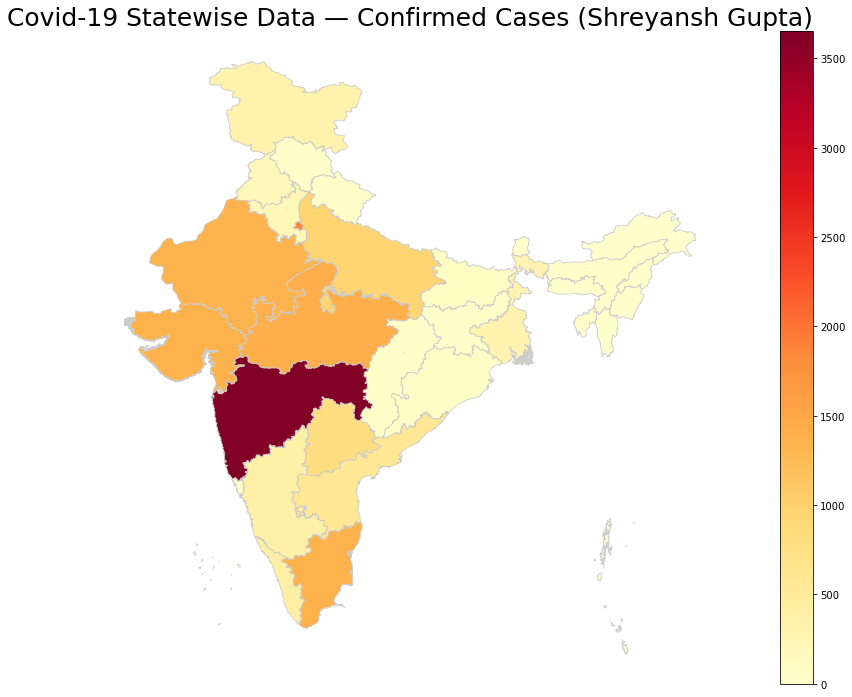

In [19]:
map_data = gpd.read_file('Igismap/Indian_States.shp')
map_data.rename(columns = {'st_nm':'States/UT'}, inplace = True)
map_data.head()

map_data['States/UT'] = map_data['States/UT'].str.replace('&','and')
map_data['States/UT'].replace('Arunanchal Pradesh',
                              'Arunachal Pradesh', inplace = True)
map_data['States/UT'].replace('Telangana', 
                              'Telengana', inplace = True)
map_data['States/UT'].replace('NCT of Delhi', 
                              'Delhi', inplace = True)
map_data['States/UT'].replace('Andaman and Nicobar Island', 
                              'Andaman and Nicobar Islands', 
                               inplace = True)



merged_data = pd.merge(map_data, state_data, 
                       how = 'left', on = 'States/UT')
merged_data.fillna(0, inplace = True)
merged_data.drop('Sr.No', axis = 1, inplace = True)
merged_data.head()


fig, ax = plt.subplots(1, figsize=(20, 12))
ax.axis('off')
ax.set_title('Covid-19 Statewise Data — Confirmed Cases (Shreyansh Gupta)', 
             fontdict =  {'fontsize': '25', 'fontweight' : '3'})
merged_data.plot(column = 'Confirmed', cmap='YlOrRd', 
                 linewidth=0.8, ax=ax, edgecolor='0.8', 
                 legend = True)
